# Padrões representativos de cores

## Cores primárias:

Sabemos que enxergamos uma pequena faixa de frequência de onda, se extendendo de 400nm a 700nm aproximadamente. Isso se deve ao modo como nosso olho capta as cores através das células-cone. na imagem abaixo:

[![](https://i2.wp.com/blog.asmartbear.com/wp-content/uploads/Cone-fundamentals-with-srgb-spectrum.png?resize=450%2C292)](https://i2.wp.com/blog.asmartbear.com/wp-content/uploads/Cone-fundamentals-with-srgb-spectrum.png?resize=450%2C292)


### RGB

Em 1931 a CIE *(Commission Internationale de l'Eclairage)* definiu o RGB (red, green, blue) como as cores primárias aditivas, pois a soma da intensidade das ondas correspondentes a essas cores formam as cores que enxergamos, lógico que isso se dá ao fato dos humanos serem em maioria **tricromatas**, mas essa é uma condição que varia de espécie para espécie e até mesmo entre indivíduos ou populações, usamos padrões tricromatas por representar a grande maioria da população de nossa espécie.

abaixo podemos visualizar essa relação de adição, adaptada no padrão RGB usada nos mopnitores de computador, de celular, nas TV, enfim, em telas que emitem luz e assim fica bem mais simples calcular os valores dos pixels.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams as rc
from matplotlib.colors import rgb_to_hsv
from matplotlib import image as imglib
import matplotlib.cbook as cbook
import numpy as np
from ipywidgets import interact
rc['figure.figsize'] = 5, 5

In [2]:
@interact(r=(0,255,5),g=(0,255,5),b=(0,255,5))
def rgb_view(r=0,g=0,b=0):
    image = np.zeros(shape=(10, 10, 3), dtype=np.uint8)
    image[::, ::, 0] = r
    image[::, ::, 1] = g
    image[::, ::, 2] = b
    plt.imshow(image)
    return r,g,b

A Jupyter Widget

### CMY K

Se olharmos as laterais do triângulo formado ao considerar os cantos as cores aditivas "puras" e ver ao longo do triângulo sua mistura, percebemos que as lateriais evidenciam a máxima absorção de luz do canto oposto, repare na imagem abaixo:

<a title="By Hankwang at English Wikipedia [Public domain], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File%3ACIExy1931_srgb_gamut.png"><img width="512" alt="CIExy1931 srgb gamut" src="https://upload.wikimedia.org/wikipedia/commons/d/d3/CIExy1931_srgb_gamut.png"></a>

*The sRGB color triangle, shown as a subset of x,y space, a chromaticity space based on CIE 1931 colorimetry*


Então se definiu o padrão CMY como um padrão de cores subtartivo, pois se trata da absorção de luz e portanto da subtração de valores. ùtil especialmente para impressoras, já que a tinta absorve uma gama de cores e reflete outra, podemos ver claramente a lógica do funcionamento desse padrão logo abaixo:

*obs.: na prática o padrão CMYK não vai de 0 a 255 como o RGB, ele é calculado de 0 a 1 sendo tratado como uma porcentagem da absorção de luz (0% a 100%)

In [6]:
@interact(c=(0,255,5),m=(0,255,5),y=(0,255,5))
def rgb_view(c=0,m=0,y=0):
    image = np.zeros(shape=(10, 10, 3), dtype=np.uint8)
    image[::, ::, 0] = 255-c
    image[::, ::, 1] = 255-m
    image[::, ::, 2] = 255-y
    plt.imshow(image)
    return c,m,y

A Jupyter Widget

### outros padrões: HSV, HLS, IHS...

![](https://beatrizxe.com/images/blog/blog_diseno/teoria-del-color/HSV.jpg)

Acima vemos uma representação do padrão HSV que significa Hue(tonalidade), Saturation (Saturação) e Value (Valor). Esses padrões citados neste subtópico tem a característica de representar uma variação contínua das tonalidades, ficando as outras carecterísticas como um percentual, assim temos um círculo de 360º passando mesmos mesmos RGB, CMY mas tendo maior independência de nas outras características (que dependendo do padrão, podem ser saturação, luminosidade, intensidade, etc.).

Ainda são usados internamente nos calculos para definir os valores dos pixels e ocasionalmente podem reaparecer em tecnologias testadas em monitores para tentar representar com maior fidelidade a forma como as cores se apresentam a nós na natureza.

Abaixo poderá perceber como a lógica do HSV nada tem a ver com a forma como trabalhamos diretamente com pixels:

In [11]:
@interact(h=(0,365,1),s=(0,1,0.01),v=(0,1,0.01))
def rgb_view(h=0,s=0,v=0):
#     hsv_img = rgb_to_hsv(np.zeros(shape=(512, 512, 3), dtype=np.uint8))
    hsv_img = np.zeros(shape=(10, 10, 3), dtype=np.float32)

    hsv_img[::, ::, 0] = h    
    hsv_img[::, ::, 1] = s
    hsv_img[::, ::, 2] = v
    plt.imshow(rgb_to_hsv(hsv_img))
    return h,s,v

A Jupyter Widget

Ainda que a lógica do funcionamento de cada padrão tenha suas especificidades, é ṕossível converter as imagens entre um e outro padrão, abaixo uma demonstração de uma conversão sem tentar chegar na tonalidade certa, mas na tonalidade relativa ao valor de cada pixel.

Text(0.5,1,'HSV')

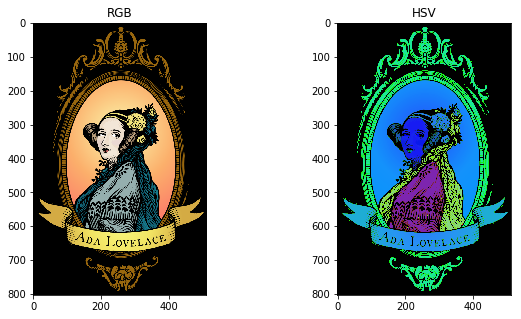

In [4]:
rgb = imglib.imread(cbook.get_sample_data("ada.png"))[:,:,:3]
hsv = rgb_to_hsv(rgb)
f, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].imshow(rgb)
ax[0].set_title("RGB")
ax[1].imshow(hsv)
ax[1].set_title("HSV")


---

leituras recomendadas:

* http://www.ufrgs.br/engcart/PDASR/formcor.html